In [1]:
from modules import computenlttcepstro
import numpy as np
import os
import pickle as pk
import numpy as np
from scipy import signal
import pickle as pk
import os
from modules import computestaticresponse
import matplotlib.pyplot as plt
try:
    import sportran as st
except ImportError:
    from sys import path
    path.append('..')
    import sportran as st
from sportran import md
import time

/home/endrigo/anaconda3/lib/python3.8/site-packages/sportran/plotter/style.py:39: UserWarning: The plot style api_style.mplstyle could not be loaded.
  warn('The plot style {} could not be loaded.'.format(plot_style_filename))


In [2]:
jfile = st.i_o.TableFile('/scratch/endrigo/spce/dump05fs/1current.out', group_vectors=True)

Temp c_flux[1] c_flux[2] c_flux[3] c_vcm[1][1] c_vcm[1][2] c_vcm[1][3]
 #####################################
  all_ckeys =  [('Temp', [0]), ('flux', array([1, 2, 3])), ('vcm[1]', array([4, 5, 6]))]
 #####################################
Data length =  400001


In [3]:
jfile.read_datalines(start_step=0, NSTEPS=0, select_ckeys=['Temp','flux','vcm[1]'])


  ckey =  [('Temp', [0]), ('flux', array([1, 2, 3])), ('vcm[1]', array([4, 5, 6]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  17.946099042892456 seconds


{'Temp': array([[295.0172652 ],
        [294.2029185 ],
        [294.33235035],
        ...,
        [295.34347528],
        [298.3140971 ],
        [299.87892248]]),
 'flux': array([[-2.77650712,  3.02184272,  3.8861718 ],
        [-2.7930006 ,  2.63538778,  2.66002344],
        [-2.3419237 ,  2.29458811,  1.09113853],
        ...,
        [-0.40108067, -3.85968852, -0.70903655],
        [-2.18693332, -2.21715469, -0.17121349],
        [-3.76921846, -1.00377439,  1.12960869]]),
 'vcm[1]': array([[-9.19198412e-06,  2.47767554e-05,  1.83127519e-05],
        [-2.18546156e-05,  1.67200194e-05,  1.89867614e-05],
        [-3.79695500e-05,  1.15567677e-05,  1.39942738e-05],
        ...,
        [ 2.80113300e-05, -1.89815877e-08, -1.23315679e-05],
        [ 7.59687406e-06, -1.12662577e-05, -7.69777844e-06],
        [-1.30851869e-05, -1.84283352e-05, -2.92178618e-07]])}

In [4]:
temp=np.transpose(np.loadtxt('/scratch/endrigo/spce/dump05fs/nve1.out'))[2]
np.mean(temp)

295.6067820492892

In [5]:
DT_FS = 0.5*5 #fs sono in unita' real!!

VOLUME=24.851017**3

TEMPERATURE=295.6067820492892

j = st.HeatCurrent([jfile.data['flux']], DT_FS=DT_FS,
                UNITS='real', VOLUME=VOLUME, TEMPERATURE=TEMPERATURE)


Using single component code.


In [6]:
fstar_THz =60


jf = j.resample(fstar_THz=fstar_THz)


j.cepstral_analysis()


jf.cepstral_analysis()


j.compute_acf()

Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     200.00000 THz
 Resampling freq          f* =      66.66667 THz
 Sampling time         TSKIP =             3 steps
                             =         7.500 fs
 Original  n. of frequencies =        200001
 Resampled n. of frequencies =         66667
 min(PSD)          (pre-filter&sample) =      0.00000
 min(PSD)         (post-filter&sample) =      0.01773
 % of original PSD Power f<f* (pre-filter&sample)  = 99.906 %
 fPSD not calculated before resampling
 -----------------------------------------------------

-----------------------------------------------------
  CEPSTRAL ANALYSIS
-----------------------------------------------------
  AIC_Kmin  = 93  (P* = 94, corr_factor = 1.000000)
  L_0*   =           3.857588 +/-   0.019216
  S_0*   =          68.481449 +/-   1.315955
------------------

<IPython.core.display.Javascript object>


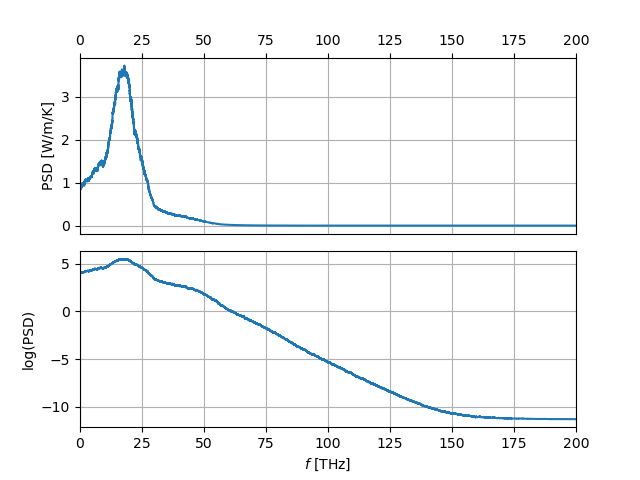

<IPython.core.display.Javascript object>


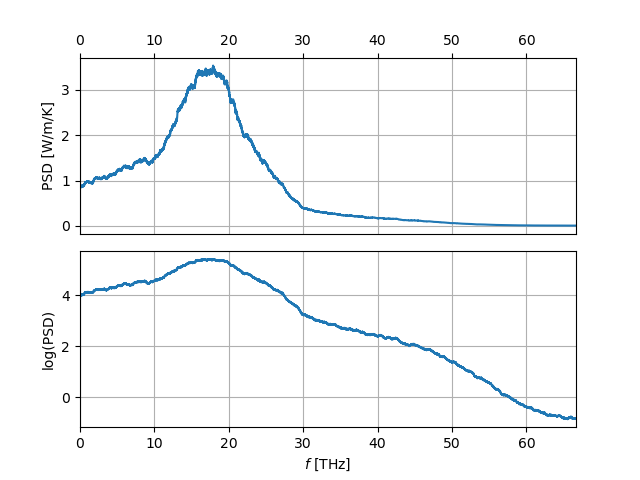

array([<AxesSubplot:ylabel='PSD [W/m/K]'>,
       <AxesSubplot:xlabel='$f$ [THz]', ylabel='log(PSD)'>], dtype=object)

In [7]:
%matplotlib notebook
j.plot_periodogram(PSD_FILTER_W=0.5, kappa_units=True)
jf.plot_periodogram(PSD_FILTER_W=0.5, kappa_units=True)

<IPython.core.display.Javascript object>


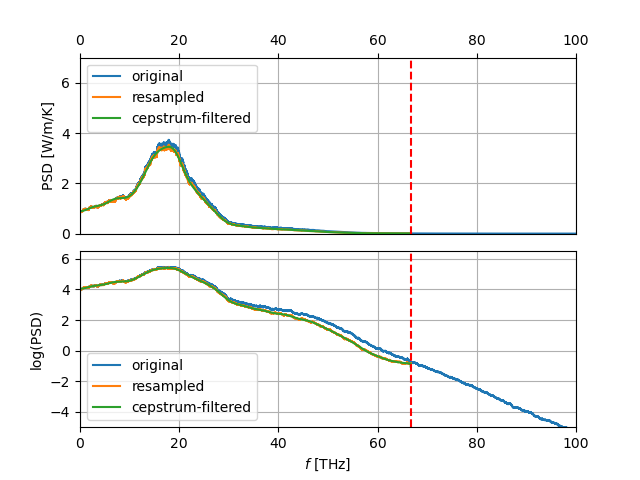

In [8]:
# filtered log-PSD
ax = j.plot_periodogram(0.5, kappa_units=True)
ax = jf.plot_periodogram(0.5, axes=ax, kappa_units=True)
ax = jf.plot_cepstral_spectrum(axes=ax, kappa_units=True)
ax[0].axvline(x = jf.Nyquist_f_THz, ls='--', c='r')
ax[1].axvline(x = jf.Nyquist_f_THz, ls='--', c='r')
plt.xlim([0, 100])
ax[0].set_ylim([0, 7]);
ax[1].set_ylim([-5, 6.5]);
ax[0].legend(['original', 'resampled', 'cepstrum-filtered'])
ax[1].legend(['original', 'resampled', 'cepstrum-filtered']);

In [23]:
j.compute_gkintegral()

<IPython.core.display.Javascript object>


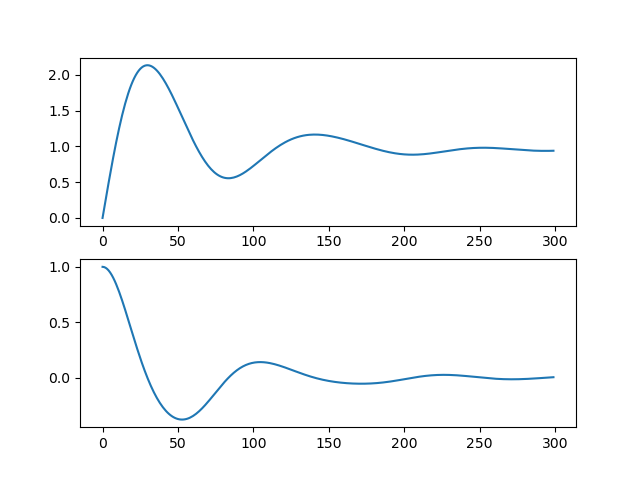

In [24]:
import matplotlib.pyplot as plt
%matplotlib notebook
f,ax=plt.subplots(2)
ax[0].plot(j.taum[:300]*j.KAPPA_SCALE*0.5)
ax[1].plot(j.acfm[:300]/j.acfm[0])

<IPython.core.display.Javascript object>


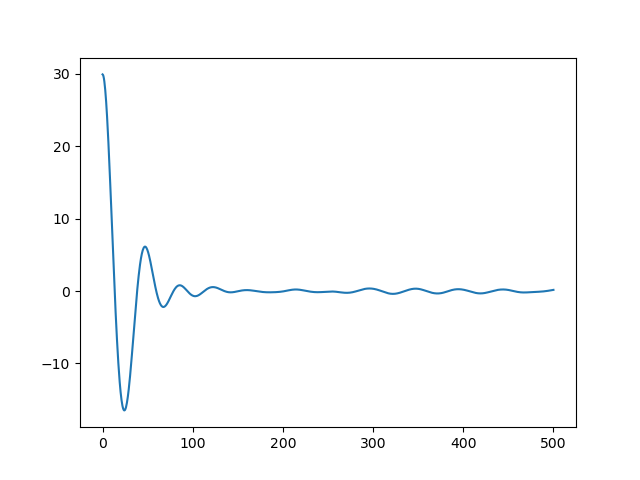

In [13]:
%matplotlib notebook
plt.plot(np.linspace(0,1000,1000)*DT_FS,j.acfm[:1000])